___
# MINIPROJETO 1

## <font color='red'>Patrick Serrano Wiegerinck</font>
___

## <font color='blue'>Uso de energia no mundo (kg de petróleo per capita)</font>

 No projeto a seguir será analisado a variável quantitativa da quantidade de energia que é utilizada no mundo per capita em um ano, em kg de petróleo. O espaço amostral utilizado para realizar esse trabalho foi de, aproximadamente, 239 países, simulando a realidade do mundo. O objetivo é analisar o uso de energia em um ano por todos os países cadastrados na base de dados do World Bank, de forma a calcular a frequência de países consumirem certo nível de energia em kg de petróleo.
 
 link do base de dados: http://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE?view=chart

___
### Itens 1 a 3 - Resolução:

##### Importando as ferramentas necessárias para a realização do projeto

In [310]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import pylab as pl

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Patrick Wiegerinck\Documents\2 Semestre\Ciência dos Dados\Mini Projeto 1


##### Realizando a leitura da base de dados

In [311]:
ENE = pd.read_excel('ENERGIA1.xlsx', sep=" ")

In [312]:
ENE.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,a2013,2014,2015
0,Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,AGO,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,542.108669,561.550106,589.420122,620.638746,632.248119,638.642146,689.050938,654.905481,NaN,NaN
4,Albania,ALB,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,689.300452,679.861765,697.004120,722.583867,724.562919,770.340267,685.956403,800.568726,NaN,NaN


In [313]:
ENE.shape

(264, 60)

##### Delimeitando a variável que será utilizada no projeto

In [314]:
e = pd.DataFrame()
e["Ano_2013"] = ENE[~ENE.a2013.isnull()].a2013

##### Descrevendo as características da variável que será analisada no projeto

In [315]:
e["Ano_2013"].describe()

count      181.000000
mean      2435.924120
std       2849.268962
min         59.120066
25%        670.790705
50%       1466.608239
75%       3019.819231
max      19120.344284
Name: Ano_2013, dtype: float64

##### Criando a faixa que será utilizada para plotar o histograma da variável

In [316]:
faixa = np.arange(0,20000,250)

## Histograma da Variável

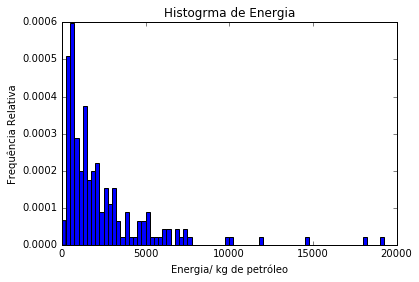

In [317]:
plot = e.Ano_2013.plot.hist(bins=faixa, normed=True)
plt.xlabel("Energia/ kg de petróleo")
plt.ylabel("Frequência Relativa")
plt.title("Histogrma de Energia")

 Como pode ser visto pelo histograma, a variável escolhida resulta num gráfico assimétrico à direita, ou positivo, uma vez que a moda é menor que a mediana, que, por sua vez, é menor que a média.

___
### Itens 4 a 6 - Resolução:

## Tipo de distribuição:
 A variável escolhida é contínua, pois os valores representados no eixo "x" podem apresentar valores não inteiros, uma vez que a quantidade de energia, em kg de petróleo, utilizados per capita não será necessariamente um valor inteiro.

## Distribuição Lognormal

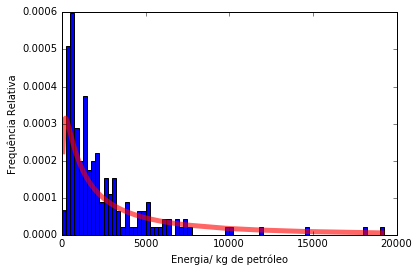

In [318]:
x = sorted(e.Ano_2013)
plt.plot(x, stats.lognorm.pdf(x, 1.6, loc= 0, scale=2849.2),'r-', lw=5, alpha=0.6, label='lognorm pdf')
plot = e.Ano_2013.plot.hist(bins=faixa, normed=True)
plt.xlabel("Energia/ kg de petróleo")
plt.ylabel("Frequência Relativa")

## Distribuição Weibull

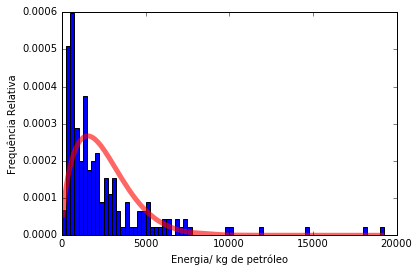

In [319]:
x = sorted(e.Ano_2013)
plt.plot(x, stats.weibull_min.pdf(x, 1.6, loc= 0, scale=2849.2),'r-', lw=5, alpha=0.6, label='lognorm pdf')
plot = e.Ano_2013.plot.hist(bins=faixa, normed=True)
plt.xlabel("Energia/ kg de petróleo")
plt.ylabel("Frequência Relativa")

## Utilização do comando .fit() para estimar os valores dos parâmetros

## Lognormal 

##### Geração dos parâmetros da distribuição lognormal por meio da ferramenta fit

In [320]:
a = stats.lognorm.fit(x)
a

(6.4962676043377989, 59.120065724854896, 4.1605574348361216)

#### Comparação entre a função com os parâmetros estimados no item 5 em relação ao dos estimados pelo comando fit

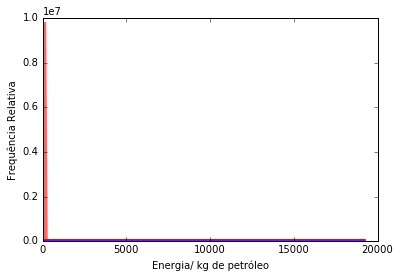

In [321]:
plt.plot(x, stats.lognorm.pdf(x, a[0], loc= a[1], scale=a[2]),'r-', lw=5, alpha=0.6, label='lognorm pdf')
plt.plot(x, stats.lognorm.pdf(x, 1.6, loc= 0, scale=2849.2), lw=5, alpha=0.6, label='lognorm pdf')
plot = e.Ano_2013.plot.hist(bins=faixa, normed=True)
plt.xlabel("Energia/ kg de petróleo")
plt.ylabel("Frequência Relativa")

O gráfico acima se apresenta dessa forma, pois os parâmetros gerados pelo comando fit não apresentam uma boa simulação do comportamento do histograma da variável analisada.

## Weibull

##### Geração dos parâmetros da distribuição de Weibull por meio da ferramenta fit

In [322]:
b = stats.weibull_min.fit(x)
b

(0.96738106641231991, 59.120065724854896, 2324.7249690164745)

#### Comparação entre a função com os parâmetros estimados no item 5 em relação ao dos estimados pelo comando fit

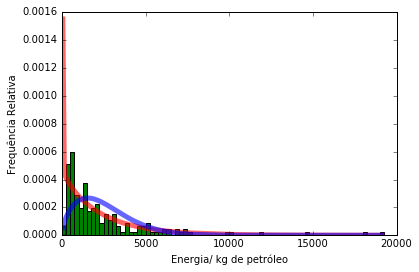

In [323]:
plt.plot(x, stats.weibull_min.pdf(x, b[0], loc= b[1], scale=b[2]),'r-', lw=5, alpha=0.6, label='lognorm pdf')
plt.plot(x, stats.weibull_min.pdf(x, 1.6, loc= 0, scale=2849.2), lw=5, alpha=0.6, label='lognorm pdf')
plot = e.Ano_2013.plot.hist(bins=faixa, normed=True)
plt.xlabel("Energia/ kg de petróleo")
plt.ylabel("Frequência Relativa")

## Escolha dos parâmetros mais adequados para a análise da variável contínua
Como pode ser visto de primeira mão pelos gráficos plotados acima os parâmetros estimados pelo comando fit não são totalmente verdadeiros em relação aos histogramas plotados acima. No caso da função Lognormal os parâmetros estimados pelo fit não podem ser utilizados para simular o comportamento do histograma, já no caso da função de Weibull os parâmetros estimados pelo fit podem ser utilizados para simular o comportamento do histograma, porém ele poderia ser adaptado com a modificação do valor do parâmetro "loc" de 59 para 0.

___
### Itens 7 a 9 - Resolução:

## Gráfico do Histograma com a distrubuição da Lognormal e de Weibull

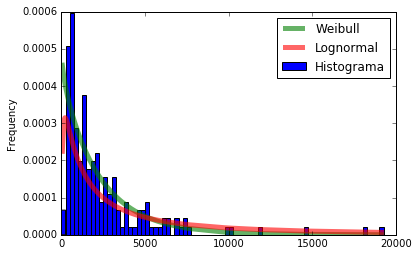

In [324]:
plot = e.Ano_2013.plot.hist(bins=faixa, normed=True)
plt.plot(x, stats.weibull_min.pdf(x, b[0], loc= 0, scale=b[2]), lw=5, alpha=0.6, label='lognorm pdf')
plt.plot(x, stats.lognorm.pdf(x, 1.6, loc= 0, scale=2849.2),'r-', lw=5, alpha=0.6, label='lognorm pdf')
plt.legend(("Weibull","Lognormal","Histograma"))

O gráfico acima representa o união da distribuição lognormal, com os parâmetros estimados sem o comando fit, da distribuição de Weibull, com os parâmetros estimados pelo comando fit, com excessão do "loc", que foi substituído por 0, e do histograma da variável analisada.

## Q-Q Plot das distribuições com os parâmetros estimados sem o comando fit

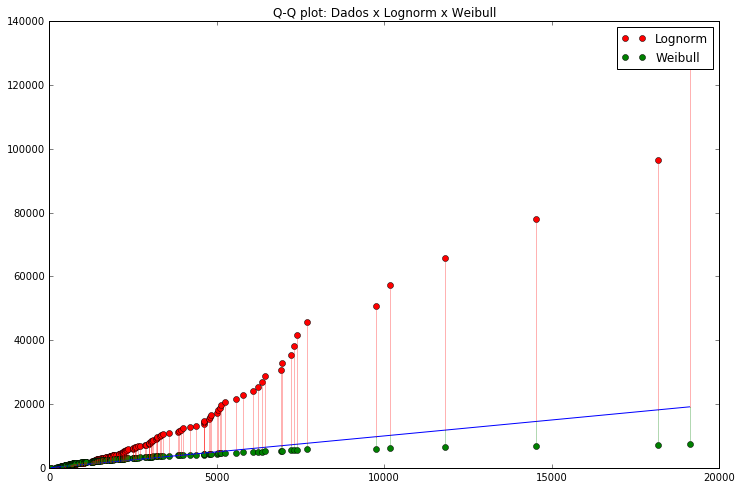

In [346]:
ea2013 = pd.Series(sorted(e.Ano_2013.dropna()))

fra = [] # frequencia relativa acumulada
for i in range(len(ea2013)):
    acc = (i - 0.5) / len(ea2013)
    if acc < 0:
        acc = 0
    fra.append(acc)

fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_ln0 = stats.lognorm.ppf(fra, 1.6, loc=0, scale=2849.2) # quantis teóricos da exponencial
q_wb0 = stats.weibull_min.ppf(fra, 1.6, loc=0, scale=2849.2)

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Lognorm x Weibull")

ln_plot, = plt.plot(ea2013, q_ln0, 'o', color="red", label="Lognorm")
wb_plot, = plt.plot(ea2013, q_wb0, 'o', color="green", label = "Weibull")

plt.legend(handles=[ln_plot, wb_plot])
plt.plot((min(ea2013), max(ea2013)), (min(ea2013), max(ea2013)), '-')


for i in range(len(ea2013)):
    plt.plot((ea2013[i], ea2013[i]), (q_ln0[i], ea2013[i]), '-', color='red', alpha=0.3  )
    plt.plot((ea2013[i], ea2013[i]), (q_wb0[i], ea2013[i]), '-', color='green', alpha=0.3  )


A partir do gráfico pode-se analisar que a distribuição lognormal, com os parâmetros adotados nesse caso, não simulam bem o comportamento do histograma da variável, uma vez que os pontos plotados por essa distribuição fogem da bissetriz representada pela reta azul. Isso não vale para a distribuição de Weibull, que apesar de fugir parcialmente da reta azul, apresenta uma simulação mais real da variável analisada.

## Testes de aderência que usam a cumulativa com os parâmetros estimados sem o fit

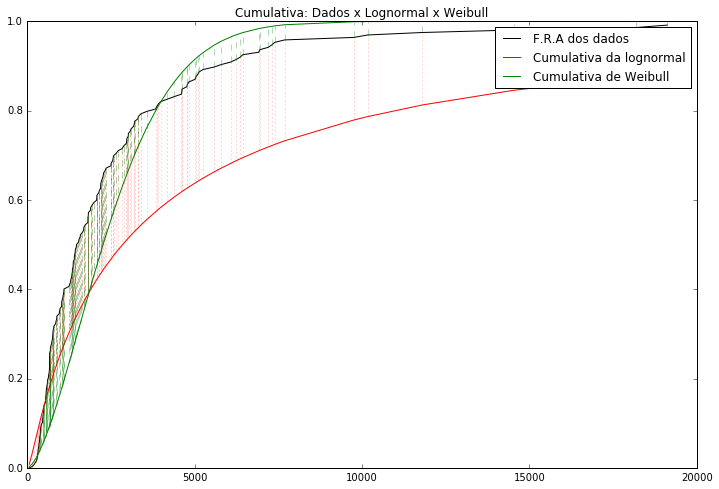

In [348]:
# fra e FDA
cdf_lognormal0 = stats.lognorm.cdf(ea2013, 1.6, loc=0, scale=2849.2) #FDA
cdf_weibull0 = stats.weibull_min.cdf(ea2013, 1.6, loc=0, scale=2849.2)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Lognormal x Weibull")

dados_fra_plot, = plt.plot(ea2013, fra, '-', color='black', label="F.R.A dos dados")
cdf_ln_plot,   = plt.plot(ea2013, cdf_lognormal0, '-', color='red', label = "Cumulativa da lognormal")
cdf_wb_plot, = plt.plot(ea2013, cdf_weibull0, '-', color='green', label = "Cumulativa de Weibull")

plt.legend(handles=[dados_fra_plot, cdf_ln_plot, cdf_wb_plot])


for i in range(len(ea2013)):
    plt.plot((ea2013[i], ea2013[i]), (fra[i], cdf_lognormal0[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((ea2013[i], ea2013[i]), (fra[i], cdf_weibull0[i]), '--', color="green", alpha=0.3)

Percebe-se nesse gráfico como a distribuição lognormal não representa a frequência relativa acumulada dos dados da variável analisada. O mesmo acontece com a de Weibull, porém numa escala muito menor.

## Q-Q Plot das distribuições com os parâmetros estimados com o comando fit

### Distribuição Lognormal

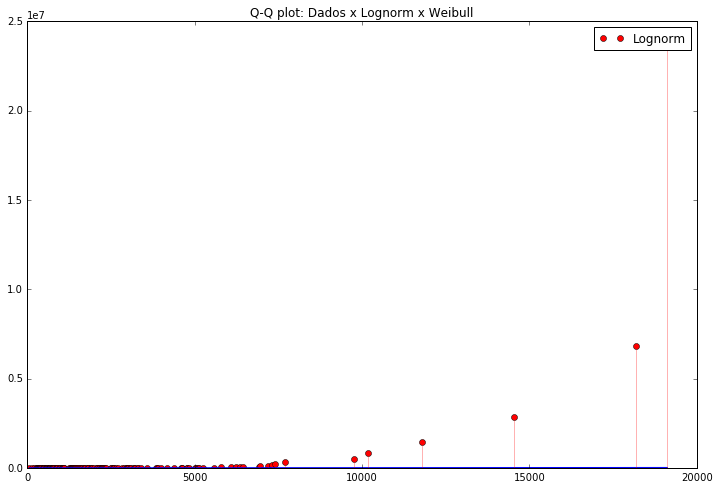

In [366]:
ea2013 = pd.Series(sorted(e.Ano_2013.dropna()))

fra = [] # frequencia relativa acumulada
for i in range(len(ea2013)):
    acc = (i - 0.5) / len(ea2013)
    if acc < 0:
        acc = 0
    fra.append(acc)

fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_ln1 = stats.lognorm.ppf(fra, a[0], loc=a[1], scale=a[2]) # quantis teóricos da exponencial

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Lognorm x Weibull")

ln_plot, = plt.plot(ea2013, q_ln1, 'o', color="red", label="Lognorm")

plt.legend(handles=[ln_plot])
plt.plot((min(ea2013), max(ea2013)), (min(ea2013), max(ea2013)), '-')


for i in range(len(ea2013)):
    plt.plot((ea2013[i], ea2013[i]), (q_ln1[i], ea2013[i]), '-', color='red', alpha=0.3  )

A partir do gráfico a seguir percebe-se que a distribuição lognormal, com os parâmetros estimados pelo comando fit, não representa o comportamento do histograma da variável analisada, visto como os pontos daquela foge da reta azul.

### Distribuição de Weibull

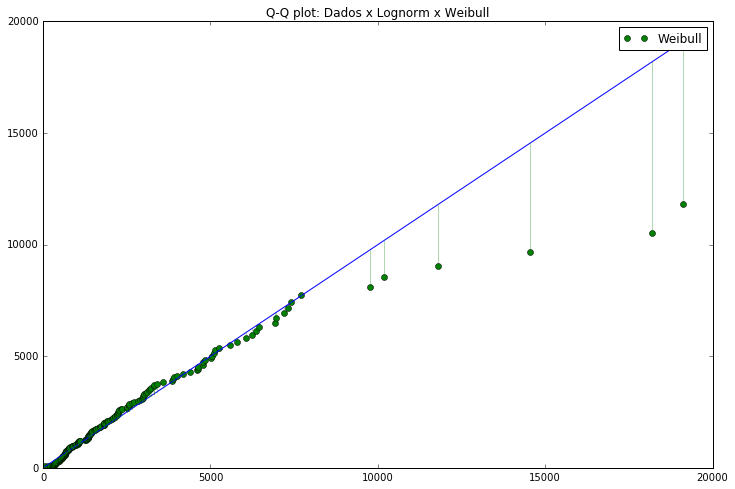

In [367]:
ea2013 = pd.Series(sorted(e.Ano_2013.dropna()))

fra = [] # frequencia relativa acumulada
for i in range(len(ea2013)):
    acc = (i - 0.5) / len(ea2013)
    if acc < 0:
        acc = 0
    fra.append(acc)

fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_wb1 = stats.weibull_min.ppf(fra, b[0], loc=b[1], scale=b[2])

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Lognorm x Weibull")

wb_plot, = plt.plot(ea2013, q_wb1, 'o', color="green", label = "Weibull")

plt.legend(handles=[wb_plot])
plt.plot((min(ea2013), max(ea2013)), (min(ea2013), max(ea2013)), '-')


for i in range(len(ea2013)):
    plt.plot((ea2013[i], ea2013[i]), (q_wb1[i], ea2013[i]), '-', color='green', alpha=0.3  )

A partir do gráfico acima percebe-se como a distribuição de Weibull, com os parâmetros estimados pelo comando fit, representa de forma muito mais eficiente o comportamento do histograma da variável analisada, do que a distribuição lognormal.

## Testes de aderência que usam a cumulativa com os parâmetros estimados com o fit

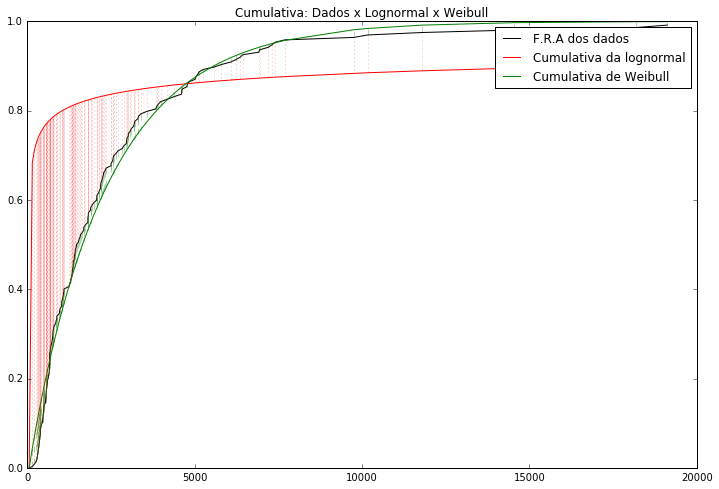

In [350]:
# fra e FDA
cdf_lognormal1 = stats.lognorm.cdf(ea2013, a[0], loc=a[1], scale=a[2]) #FDA
cdf_weibull1 = stats.weibull_min.cdf(ea2013, b[0], loc=b[1], scale=b[2])


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Lognormal x Weibull")

dados_fra_plot, = plt.plot(ea2013, fra, '-', color='black', label="F.R.A dos dados")
cdf_ln_plot,   = plt.plot(ea2013, cdf_lognormal1, '-', color='red', label = "Cumulativa da lognormal")
cdf_wb_plot, = plt.plot(ea2013, cdf_weibull1, '-', color='green', label = "Cumulativa de Weibull")

plt.legend(handles=[dados_fra_plot, cdf_ln_plot, cdf_wb_plot])


for i in range(len(ea2013)):
    plt.plot((ea2013[i], ea2013[i]), (fra[i], cdf_lognormal1[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((ea2013[i], ea2013[i]), (fra[i], cdf_weibull1[i]), '--', color="green", alpha=0.3)

O gráfico acima é mais uma evidência de como a distribuição lognormal, com os parâmetros estimados pelo comando fit, não simula a frequência relativa acumulada da variável. A distribuição de Weibull, porém, representa de forma muito eficiente a frequência relativa acumulada, visto que a linha da Cumulativa de Weibull acompanha de forma muito semelhante a F.R.A. dos dados da variável.

___
### Itens 10 e 11 - Resolução:

## Testes de aderência que usam a diferença entre quantis

### <font color='red'>Parâmetros sem fit</font>

### Erro quadrático

In [352]:
erro_quadratico_lognormal0 = sum((ea2013 - q_ln0)**2)
erro_quadratico_weibull0 = sum((ea2013 - q_wb0)**2)

print("Erro quadrático da lognormal : {:4.3f}\n".format(erro_quadratico_lognormal0))
print("Erro quadrático da weibull : {:4.3f}\n".format(erro_quadratico_weibull0))

Erro quadrático da lognormal : 40230061324.917

Erro quadrático da weibull : 452755084.011



### Erro quadrático médio

In [353]:
eqm_ln0 = erro_quadratico_lognormal0/len(ea2013)
eqm_wb0 = erro_quadratico_weibull0/len(ea2013)

print("Erro quadratico médio da lognormal : {0}".format(eqm_ln0))
print("Erro quadratico médio da weibull : {0}".format(eqm_wb0))

Erro quadratico médio da lognormal : 222265532.18186328
Erro quadratico médio da weibull : 2501409.3039302123


### Soma de diferenças

In [355]:
soma_diferenças_lognormal0 = sum(abs(ea2013 - q_ln0))
soma_diferenças_weibull0 = sum(abs(ea2013 - q_wb0))

print("Soma de diferenças da lognormal : {0}".format(soma_diferenças_lognormal0))
print("Soma de diferenças da weibull : {0}".format(soma_diferenças_weibull0))

Soma de diferenças da lognormal : 1094402.0696457822
Soma de diferenças da weibull : 145419.8972812302


### <font color='red'>Parâmetros com fit</font>

### Erro quadrático

In [356]:
erro_quadratico_lognormal1 = sum((ea2013 - q_ln1)**2)
erro_quadratico_weibull1 = sum((ea2013 - q_wb1)**2)

print("Erro quadrático da lognormal : {:4.3f}\n".format(erro_quadratico_lognormal1))
print("Erro quadrático da weibull : {:4.3f}\n".format(erro_quadratico_weibull1))

Erro quadrático da lognormal : 629089564218145.000

Erro quadrático da weibull : 153762972.841



### Erro quadrático médio

In [357]:
eqm_ln1 = erro_quadratico_lognormal1/len(ea2013)
eqm_wb1 = erro_quadratico_weibull1/len(ea2013)

print("Erro quadratico médio da lognormal : {0}".format(eqm_ln1))
print("Erro quadratico médio da weibull : {0}".format(eqm_wb1))

Erro quadratico médio da lognormal : 3475632951481.464
Erro quadratico médio da weibull : 849519.1869653201


### Soma de diferenças

In [358]:
soma_diferenças_lognormal1 = sum(abs(ea2013 - q_ln1))
soma_diferenças_weibull1 = sum(abs(ea2013 - q_wb1))

print("Soma de diferenças da lognormal : {0}".format(soma_diferenças_lognormal1))
print("Soma de diferenças da weibull : {0}".format(soma_diferenças_weibull1))

Soma de diferenças da lognormal : 37522962.391131006
Soma de diferenças da weibull : 50597.56184865012


## Testes de aderência que usam a cumulativa

### <font color='red'>Parâmetros sem fit</font>

### Erro quadrático nas CDFs

In [359]:
# Erro quadrático nas CDFs
erro_quad_cdf_lognormal0 = sum((fra - cdf_lognormal0)**2)

erro_quad_cdf_weibull0 = sum((fra - cdf_weibull0)**2)

print("Erro quadrático da CDF da Lognormal versus F.R.A: {0}".format(erro_quad_cdf_lognormal0))
print("Erro quadrático da CDF da Weibull versus F.R.A: {0}".format(erro_quad_cdf_weibull0))

Erro quadrático da CDF da Lognormal versus F.R.A: 4.572790168161453
Erro quadrático da CDF da Weibull versus F.R.A: 3.0088469990899234


### Diferenças absolutas

In [360]:
# Diferenças absolutas
soma_difs_cdf_lognormal0 = sum( abs(fra - cdf_lognormal0))
soma_difs_cdf_weibull0 = sum( abs(fra - cdf_weibull0))

print("Erro da soma do módulo das diferenças da lognormal versus F.R.A: {0} \nErro da soma do módulo das diferenças de weibull versus F.R.A: {1}".format(soma_difs_cdf_lognormal0, soma_difs_cdf_weibull0))

Erro da soma do módulo das diferenças da lognormal versus F.R.A: 24.931892400090682 
Erro da soma do módulo das diferenças de weibull versus F.R.A: 19.99247314694425


### Teste de aderência de Kolmogorov-Smirnov

In [361]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_ln0 = max(abs(fra-cdf_lognormal0))
ks_aderencia_wb0 = max(abs(fra-cdf_weibull0))


print("Teste K-S para a lognormal com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a weibull com scale={:4.3f}, loc=0 e a={:4.3f}  {:4.3f}:".format(2435.9, ks_aderencia_ln0, 2435.9/1.6, 1.6, ks_aderencia_wb0))

Teste K-S para a lognormal com μ= 2435.90: 0.249
Teste K-S para a weibull com scale=1522.438, loc=0 e a=1.600  0.206:


### <font color='red'>Parâmetros com fit</font>

### Erro quadrático nas CDFs

In [363]:
# Erro quadrático nas CDFs
erro_quad_cdf_lognormal1 = sum((fra - cdf_lognormal1)**2)

erro_quad_cdf_weibull1 = sum((fra - cdf_weibull1)**2)

print("Erro quadrático da CDF da Lognormal versus F.R.A: {0}".format(erro_quad_cdf_lognormal1))
print("Erro quadrático da CDF da Weibull versus F.R.A: {0}".format(erro_quad_cdf_weibull1))

Erro quadrático da CDF da Lognormal versus F.R.A: 28.790790881262826
Erro quadrático da CDF da Weibull versus F.R.A: 0.20514016226294385


### Diferenças absolutas

In [364]:
# Diferenças absolutas
soma_difs_cdf_lognormal1 = sum( abs(fra - cdf_lognormal1))
soma_difs_cdf_weibull1 = sum( abs(fra - cdf_weibull1))

print("Erro da soma do módulo das diferenças da lognormal versus F.R.A: {0} \nErro da soma do módulo das diferenças de weibull versus F.R.A: {1}".format(soma_difs_cdf_lognormal1, soma_difs_cdf_weibull1))

Erro da soma do módulo das diferenças da lognormal versus F.R.A: 59.34594715416089 
Erro da soma do módulo das diferenças de weibull versus F.R.A: 4.996331250152222


### Teste de aderência de Kolmogorov-Smirnov

In [365]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_ln1 = max(abs(fra-cdf_lognormal1))
ks_aderencia_wb1 = max(abs(fra-cdf_weibull1))


print("Teste K-S para a lognormal com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a weibull com scale={:4.3f}, loc=0 e a={:4.3f}  {:4.3f}:".format(2435.9, ks_aderencia_ln1, 2435.9/b[0], b[0], ks_aderencia_wb1))

Teste K-S para a lognormal com μ= 2435.90: 0.713
Teste K-S para a weibull com scale=2518.036, loc=0 e a=0.967  0.083:


## Tabela das distribuições da variável

### <font color='red'>Parâmetros sem fit</font>

|Características | Distribuição Lognormal | Distribuição de Weibull|
|----------------|------------------------|------------------------|
|Erro quadrático | 40230061324.917 | 452755084.011|
|Erro quadrático médio | 222265532.18186328 | 2501409.3039302123|
|Soma de diferenças | 1094402.0696457822 | 145419.8972812302|
|Erro quadrático nas CDFs | 4.572790168161453 | 3.0088469990899234|
|Diferenças absolutas | 24.931892400090682 | 19.99247314694425|
|Teste de aderência de Kolmogorov-Smirnov | 0.249 | 0.206|

### <font color='red'>Parâmetros com fit</font>

|Características | Distribuição Lognormal | Distribuição de Weibull|
|----------------|------------------------|------------------------|
|Erro quadrático | 629089564218145.000 | 153762972.841|
|Erro quadrático médio | 3475632951481.464 | 849519.1869653201|
|Soma de diferenças | 37522962.391131006 | 50597.56184865012|
|Erro quadrático nas CDFs | 28.790790881262826 | 0.20514016226294385|
|Diferenças absolutas | 59.34594715416089 | 4.996331250152222|
|Teste de aderência de Kolmogorov-Smirnov | 0.713 | 0.083|

Segundo as tabelas acima, que resumem todos os cálculos realizados no item anterior, pode-se chegar a conclusão de que em relação a quais parâmetros utilizar: deve-se adotar os parâmetros não gerados pelo comando fit para a distribuição lognormal, enquanto para a distribuição de Weibull deve-se adotar as geradas pelo comando fit, visto que todos os erros calculados são menores para a distribuição lognormal com os parâmetros que não foram gerados pelo fit em relação à distribuição lognormal que adotou os parâmetros do fit, já no caso da distribuição de Weibull, quando se adota os parâmetros gerados pelo fit os erros calculados são menores.

Em relação a qual dessas distribuições analisadas anteriormente seriam mais eficientes na análise da variável em questão, pode-se dizer que seria a de Weibull, que como um todo simula muito mais o comportamento do histograma da variável. Isso pode ser visto pelo resultado do teste de aderência de Kolmogorov-Smirnov da distribuição que adota os parâmetros do fit, uma vez que esse valor é relativamente muito menor do que outro gerado pelas outras distribuições.